In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Data Process

In [2]:
df = pd.read_csv('data-discretized-normalized.csv', ',')
df.drop('id', axis=1, inplace=True)
df.drop('ALUNO', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
y = df['EVASAO']
y = pd.get_dummies(y)
X = df.drop('EVASAO', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## LBFGS

In [3]:
# train model
from sklearn.neural_network import MLPClassifier
df_lbfgs = pd.DataFrame(columns=['Layers', 'Accuracy'])
count = 0
for i in range(1,27,2):
    for j in range(1,27,2):
        lbfgs_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i, j), random_state=42, max_iter=5000).fit(X_train, y_train)
        df_lbfgs.loc[count] = ([str(i)+'x'+str(j)], lbfgs_clf.score(X_test, y_test))
        count = count+1

d:\dev6\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


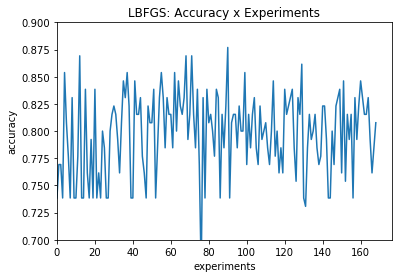

In [4]:
plt.plot(range(0,169), df_lbfgs.Accuracy)
plt.title('LBFGS: Accuracy x Experiments')
plt.ylabel('accuracy')
plt.xlabel('experiments')
plt.ylim(0.7,0.9)
plt.xlim(0,)
plt.show
plt.savefig('lbfgs.png', dpi=100)

In [5]:
df_lbfgs.sort_values('Accuracy', axis=0, ascending=False, inplace=False).head()

,Layers,Accuracy
90,[13x25],0.876923
71,[11x13],0.869231
68,[11x7],0.869231
12,[1x25],0.869231
129,[19x25],0.861538


## SGD

In [6]:
# train model
from sklearn.neural_network import MLPClassifier
df_sgd = pd.DataFrame(columns=['Layers', 'Accuracy'])
count = 0
for i in range(1,27,2):
    for j in range(1,27,2):
        sgd_clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(i, j), random_state=42, max_iter=5000).fit(X_train, y_train)
        df_sgd.loc[count] = ([str(i)+'x'+str(j)], sgd_clf.score(X_test, y_test))
        count = count+1

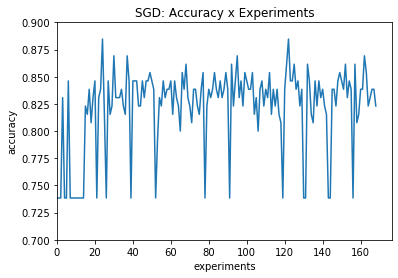

In [7]:
plt.plot(range(0,169), df_sgd.Accuracy)
plt.title('SGD: Accuracy x Experiments')
plt.ylabel('accuracy')
plt.xlabel('experiments')
plt.ylim(0.7,0.9)
plt.xlim(0,)
plt.show
plt.savefig('sgd.png', dpi=100)

In [8]:
df_sgd.sort_values('Accuracy', axis=0, ascending=False, inplace=False).head()

,Layers,Accuracy
24,[3x23],0.884615
122,[19x11],0.884615
37,[5x23],0.869231
162,[25x13],0.869231
30,[5x9],0.869231


## ADAM

In [9]:
# train model
from sklearn.neural_network import MLPClassifier
df_adam = pd.DataFrame(columns=['Layers', 'Accuracy'])
count = 0
for i in range(1,27,2):
    for j in range(1,27,2):
        adam_clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(i, j), random_state=42, max_iter=5000).fit(X_train, y_train)
        df_adam.loc[count] = ([str(i)+'x'+str(j)], adam_clf.score(X_test, y_test))
        count = count+1

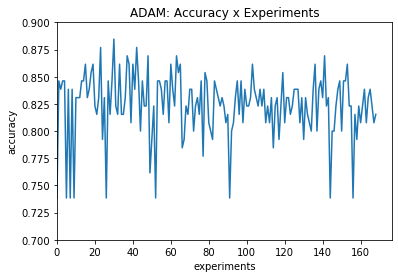

In [10]:
plt.plot(range(0,169), df_adam.Accuracy)
plt.title('ADAM: Accuracy x Experiments')
plt.ylabel('accuracy')
plt.xlabel('experiments')
plt.ylim(0.7,0.9)
plt.xlim(0,)
plt.show
plt.savefig('adam.png', dpi=100)

In [11]:
df_adam.sort_values('Accuracy', axis=0, ascending=False, inplace=False).head()

,Layers,Accuracy
30,[5x9],0.884615
42,[7x7],0.876923
23,[3x21],0.876923
63,[9x23],0.869231
37,[5x23],0.869231


## Build model with the best parameters of tests and with full data

In [12]:
dnn = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 9), random_state=42, max_iter=5000)
dnn = dnn.fit(X_train, y_train)

In [13]:
print('Accuracy: ', dnn.score(X_test, y_test))

Accuracy:  0.8846153846153846


## Save best model

In [14]:
# save model
import joblib
filename = 'dnn.sav'
joblib.dump(dnn, filename)
print('saved')

saved
